In [1]:
import requests
from urllib.request import urlopen
from urllib.parse import urlencode,unquote,quote_plus
import urllib
import lxml
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

C:\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df_industrial = pd.read_excel("산업안전보건법.xlsx")
df_erection = pd.read_excel("건설기술진흥법.xlsx")
df_danger = pd.read_excel("위험물안전관리법.xlsx")
df_electric = pd.read_excel("전기안전관리법.xlsx")
df_chemistry = pd.read_excel("화학물질관리법.xlsx")
df_info = pd.DataFrame()
df_info = df_info.append(df_industrial,ignore_index = True)
df_info = df_info.append(df_erection,ignore_index = True)
df_info = df_info.append(df_danger,ignore_index = True)
df_info = df_info.append(df_electric,ignore_index = True)
df_info = df_info.append(df_chemistry,ignore_index = True)
df_info

,키,조내용
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...
...,...,...
452,600015,제60조(벌칙) 제43조제2항에 따라 즉시 신고를 하지 아니한 자는 2년 이하의 징...
453,610015,제61조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1년 이하의 징역 또는 3...
454,620015,제62조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 6개월 이하의 징역 또는 ...
455,630015,"제63조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종..."


In [3]:
jo_key = [str(i) for i in df_info.get('키')]
df_info['키'] = jo_key
df_info

,키,조내용
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...
...,...,...
452,600015,제60조(벌칙) 제43조제2항에 따라 즉시 신고를 하지 아니한 자는 2년 이하의 징...
453,610015,제61조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1년 이하의 징역 또는 3...
454,620015,제62조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 6개월 이하의 징역 또는 ...
455,630015,"제63조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종..."


In [4]:
stop_words = pd.read_excel("stopwords.xlsx")
stop_words

,불용어
0,아
1,휴
2,아이구
3,아이쿠
4,아이고
...,...
687,해당
688,포함
689,거나
690,하다


In [5]:
okt = Okt()
tokenized_data = []
for sentence in df_info['조내용']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stop_words and len(word) > 1] # 불용어 제거
    tokenized_data.append(temp_X)

조문의 최대 길이 : 905
조문의 평균 길이 : 121.0


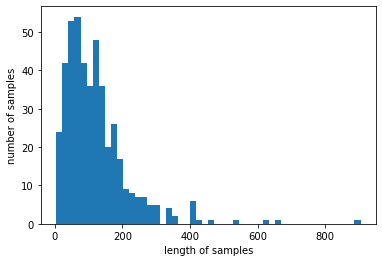

In [6]:
print('조문의 최대 길이 :',max(len(l) for l in tokenized_data))
print('조문의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [7]:
df_info['Token'] = tokenized_data
df_info

,키,조내용,Token
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...,"[1조, 목적, 산업, 안전, 보건, 기준, 확립, 하고, 책임, 소재, 명확하다,..."
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...,"[2조, 정의, 에서, 사용, 하다, 용어, 다음, 같다, 개정, 2020.5, 2..."
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업...","[3조, 적용, 범위, 모든, 사업, 적용, 하다, 다만, 유해, 위험, 정도, 사..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...,"[4조, 정부, 책무, 정부, 목적, 달성, 하다, 하다, 다음, 호의, 사항, 성..."
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...,"[5조, 업주, 의무, 업주, 77조, 따르다, 특수, 형태, 근로, 종사, 자로,..."
...,...,...,...
452,600015,제60조(벌칙) 제43조제2항에 따라 즉시 신고를 하지 아니한 자는 2년 이하의 징...,"[60조, 벌칙, 43조, 따르다, 즉시, 신고, 하다, 아니다, 자다, 2년, 이..."
453,610015,제61조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1년 이하의 징역 또는 3...,"[61조, 벌칙, 다음, 호의, 어느, 하나, 해당, 하다, 자다, 1년, 이하, ..."
454,620015,제62조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 6개월 이하의 징역 또는 ...,"[62조, 벌칙, 다음, 호의, 어느, 하나, 해당, 하다, 자다, 개월, 이하, ..."
455,630015,"제63조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종...","[63조, 규정, 법인, 대표자, 법인, 또는, 개인, 대리인, 사용, 종업원, 법..."


In [8]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)

In [9]:
model.wv.vectors.shape

(993, 100)

In [10]:
model.wv.most_similar('5조')

[('서다', 0.9980024695396423),
 ('까지', 0.9979007244110107),
 ('에도', 0.9977693557739258),
 ('선고', 0.9977180361747742),
 ('적합하다', 0.9976956248283386),
 ('개인', 0.9976122975349426),
 ('내지', 0.9976112246513367),
 ('근로', 0.9975466728210449),
 ('집행', 0.9975199699401855),
 ('자의', 0.9974830150604248)]

In [11]:
import pandas , nltk
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import RegexpTokenizer

In [12]:
# Great Input Data
# doc2vec 입력 형식에 맞게 데이터를 수정한다.
# tags = 문서 ID
# words = 단어 list

doc_df = df_info[['키','Token']].values.tolist()
tagged_data = [TaggedDocument(words=_d, tags=[uid]) for uid, _d in doc_df]

# Training
파라메터 설명
- window: 모델 학습할때 앞뒤로 보는 단어의 수
- size: 벡터 차원의 크기
- alpha: learning rate
- min_count: 학습에 사용할 최소 단어 빈도 수
- dm: 학습방법 1 = PV-DM, 0 = PV-DBOW
- negative: Complexity Reduction 방법, negative sampling
- max_epochs: 최대 학습 횟수

In [13]:
max_epochs = 10
vec_size = 100
model = Doc2Vec(
    window=10,
    vector_size=vec_size,
    alpha=0.025, 
    min_alpha=0.025,
    min_count=2,
    dm =1,
    negative = 5,
    seed = 9999)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs
               )
    # decrease the learning rate
    model.alpha -= 0.002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


# 결과 확인
특정 문서와 유사한 문서를 찾기 위해서는 2단계를 거친다.
1. 문서의 vector화
2. 변환된 vector와 가장 가까운 vector 추출
* infer_vector 사용시 seed값을 주지 않으면 random한값이 seed로 사용되어 값이 계속 변경된다.
* 학습되지 않은 단어를 사용한 문서도 결과가 나온다.

https://hanshuginn.blogspot.com/2019/03/python-doc2vec.html

In [14]:
def get_key(k) :
    if k[-1] == "1" :
        s = "산업안전보건법 제 "+k[0:(len(k)-4)]+"조"
    elif k[-1]=="2":
        s = "건설기술진흥법 제 "+k[0:(len(k)-4)]+"조"
    elif k[-1]=="3":
        s = "위험물안전관리법 제 "+k[0:(len(k)-4)]+"조"
    elif k[-1]=="4":
        s = "전기안전관리법 제 "+k[0:(len(k)-4)]+"조"
    elif k[-1]=="5":
        s = "화학물질관리법 제 "+k[0:(len(k)-4)]+"조"     
    if k[-3] != "0":
        s += "의 "+k[-3]
    return s

In [15]:
model.random.seed(9999)

doc_list = input().split(' ')

# 특정 document를 입력받았을 때 그 document 단어와 유사도가 높은 조 순서대로 출력

inferred_vector = model.infer_vector(doc_list)
return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=10)
for rd in return_docs:
    for des in df_info[df_info['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1], '\n')
        print(des)
        print()

고용노동
전기안전관리법 제 12조 0.20732367038726807 

제12조(일반용전기설비의 점검) 산업통상자원부장관은 일반용전기설비가 「전기사업법」 제67조에 따른 기술기준(이하 "기술기준"이라 한다)에 적합한지 여부에 대하여 산업통상자원부령으로 정하는 바에 따라 그 전기설비의 사용 전과 사용 중에 정기적으로 안전공사 또는 전기판매사업자로 하여금 점검(전기판매사업자는 사용전점검 중 대통령령으로 정하는 전기설비의 경우에 한정한다. 이하 이 조에서 같다)하도록 하여야 한다. 다만, 주거용 시설물에 설치된 일반용전기설비를 정기적으로 점검(이하 "정기점검"이라 한다)하는 경우 그 소유자 또는 점유자로부터 점검의 승낙을 받을 수 없는 경우에는 그러하지 아니하다. 안전공사 및 전기판매사업자는 제1항 본문에 따른 점검 결과 일반용전기설비가 기술기준에 적합하지 아니하다고 인정되는 경우에는 지체 없이 다음 각 호의 사항을 그 소유자 또는 점유자에게 통지하여야 한다. 안전공사는 정기점검 결과 기술기준에 부합하지 아니한 전기설비 중 경미한 수리(「전기공사업법」 제3조제1항 단서에 따른 경미한 전기공사에 한정한다)가 필요한 경우로서 해당 전기설비의 소유자 또는 점유자의 요청이 있는 경우에는 직접 이를 수리할 수 있다. 안전공사 및 전기판매사업자는 제1항 또는 제2항에 따른 점검 또는 통지에 관한 업무를 수행하는 경우 산업통상자원부령으로 정하는 사항을 기록·보존하여야 한다. 안전공사는 제2항에 따라 통지한 사항의 조치 이행 여부를 점검한 결과 그 소유자 또는 점유자가 통지를 받고도 같은 항 제1호의 조치를 하지 아니한 경우에는 특별자치도지사·특별자치시장·시장·군수·구청장(구청장은 자치구의 구청장을 말한다. 이하 "시장·군수·구청장"이라 한다)에게 그 조치 불이행 사실을 통보하여야 한다. 이 경우 시장·군수·구청장은 그 소유자 또는 점유자에게 그 전기설비의 수리·개조 또는 이전에 관한 명령(이하 "개선명령"이라 한다)을 하여야 하되, 전기설비가 기술기준에 적합하지 아니한 사항이

<ipython-input-15-02310684d203>:8: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(positive=[inferred_vector],topn=10)


In [16]:
docs = input('조문키를 입력하세요: ')
print()

return_docs = model.docvecs.most_similar(docs,topn=10)
for rd in return_docs:
    for des in df_info[df_info['키'] == rd[0]]['조내용']:
        print(get_key(rd[0]), rd[1], '\n')

조문키를 입력하세요: 240011

산업안전보건법 제 25조 0.6013049483299255 

산업안전보건법 제 75조 0.5699998736381531 

산업안전보건법 제 23조 0.5109585523605347 

산업안전보건법 제 94조 0.5091511607170105 

산업안전보건법 제 62조 0.5076019167900085 

산업안전보건법 제 51조 0.5025501847267151 

화학물질관리법 제 41조의 2 0.5011604428291321 

산업안전보건법 제 95조 0.5008601546287537 

산업안전보건법 제 22조 0.49356579780578613 

전기안전관리법 제 34조 0.49299222230911255 



<ipython-input-16-e7875dfe2da4>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  return_docs = model.docvecs.most_similar(docs,topn=10)


## cos_similarity 함수를 직접 생성하여 유사도 측정하기

https://sosoeasy.tistory.com/325

In [17]:
from gensim.models import Doc2Vec
from numpy import dot
from numpy.linalg import norm
import numpy as np

In [18]:
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

script="안녕하세요 첫번째 문장입니다 그럼이만".split()
scriptV=model.infer_vector(script)

ppt="이것은 두번째 문장입니다 첫번째 문장과 유사도를 비교할껍니다".split()
pptV=model.infer_vector(ppt)

print(cos_sim(scriptV,pptV))

0.0017471809


In [19]:
model

In [20]:
df_info

,키,조내용,Token
0,10011,제1조(목적) 이 법은 산업 안전 및 보건에 관한 기준을 확립하고 그 책임의 소재를...,"[1조, 목적, 산업, 안전, 보건, 기준, 확립, 하고, 책임, 소재, 명확하다,..."
1,20011,제2조(정의) 이 법에서 사용하는 용어의 뜻은 다음과 같다. <개정 2020.5.2...,"[2조, 정의, 에서, 사용, 하다, 용어, 다음, 같다, 개정, 2020.5, 2..."
2,30011,"제3조(적용 범위) 이 법은 모든 사업에 적용한다. 다만, 유해ㆍ위험의 정도, 사업...","[3조, 적용, 범위, 모든, 사업, 적용, 하다, 다만, 유해, 위험, 정도, 사..."
3,40011,제4조(정부의 책무) 정부는 이 법의 목적을 달성하기 위하여 다음 각 호의 사항을 ...,"[4조, 정부, 책무, 정부, 목적, 달성, 하다, 하다, 다음, 호의, 사항, 성..."
4,50011,제5조(사업주 등의 의무) 사업주(제77조에 따른 특수형태근로종사자로부터 노무를 제...,"[5조, 업주, 의무, 업주, 77조, 따르다, 특수, 형태, 근로, 종사, 자로,..."
...,...,...,...
452,600015,제60조(벌칙) 제43조제2항에 따라 즉시 신고를 하지 아니한 자는 2년 이하의 징...,"[60조, 벌칙, 43조, 따르다, 즉시, 신고, 하다, 아니다, 자다, 2년, 이..."
453,610015,제61조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 1년 이하의 징역 또는 3...,"[61조, 벌칙, 다음, 호의, 어느, 하나, 해당, 하다, 자다, 1년, 이하, ..."
454,620015,제62조(벌칙) 다음 각 호의 어느 하나에 해당하는 자는 6개월 이하의 징역 또는 ...,"[62조, 벌칙, 다음, 호의, 어느, 하나, 해당, 하다, 자다, 개월, 이하, ..."
455,630015,"제63조(양벌규정) 법인의 대표자나 법인 또는 개인의 대리인, 사용인, 그 밖의 종...","[63조, 규정, 법인, 대표자, 법인, 또는, 개인, 대리인, 사용, 종업원, 법..."


In [21]:
df_info.iloc[0][0]

'10011'

In [22]:
num = input('조문키를 입력하세요: ')
print()

조문키를 입력하세요: 240011



In [23]:
for i in range(len(df_info['조내용'])):
    if df_info.iloc[i][0] == num:
        script = df_info.iloc[i][1].split()
        scriptV = model.infer_vector(script)

jo_ = []
cos_ = []
for j in df_info['조내용']:
    ppt = j.split()
    pptV = model.infer_vector(ppt)
    
    cos = cos_sim(scriptV,pptV)
    cos_.append(cos)

for jo in jo_key :
    jo_.append(get_key(jo))

df_cos = pd.DataFrame({'cos_similarity':cos_}, index = jo_)
df_cos_sort = df_cos.sort_values(by=['cos_similarity'], axis=0, ascending=False)
df_cos_sort.head(10)

,cos_similarity
산업안전보건법 제 24조,0.901883
건설기술진흥법 제 52조의 2,0.622745
산업안전보건법 제 25조,0.621237
산업안전보건법 제 17조,0.616497
산업안전보건법 제 52조,0.590683
건설기술진흥법 제 3조,0.581439
건설기술진흥법 제 66조,0.576336
산업안전보건법 제 47조,0.568186
산업안전보건법 제 73조,0.567406
산업안전보건법 제 19조,0.562032


In [24]:
df_info['조내용'][7].split() == script

False

In [25]:
# 실행할 때마다 cos_similarity 값이 왜 바뀔까 ????????????????????????????